Análisis exploratorio 'Agricultura y Desarrollo Local EDA en Antiquia'

In [1]:
import funciones as func

In [2]:
# Lectura de los datos desde diferentes origenes
df_hasta_2000 = func.leer_archivo("datos_antes_2000.csv")
display(len(df_hasta_2000))

df_desde_2000 = func.leer_TablaBD("produccion_agricola_antioquia")
display(len(df_desde_2000))

df_hasta_2000["Área Total"] = df_hasta_2000["Área Total"].str.replace(",", ".").astype(float)
df_hasta_2000["Área Producción"] = df_hasta_2000["Área Producción"].str.replace(",", ".").astype(float)
df_hasta_2000["Volumen Producción"] = df_hasta_2000["Volumen Producción"].str.replace(",", ".").astype(float)

5564

c:\Users\ING. MONICA VEGA\Documents\UNAULA\agricultura_y_desarrollo_rural\ConexionBD.py:25: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(f"SELECT  * FROM dbo.{nombre_tabla}", conn)


28881

In [3]:
# Union de ambas fuentes de datos
df_completo = func.unir_data(df_hasta_2000, df_desde_2000)
display(len(df_completo))


34445

In [5]:
df_completo['Municipio'].unique()

<StringArray>
[           'Abejorral',             'Apartadó',           'Montebello',
        'Santa Bárbara',                'Turbo',              'Giraldo',
              'Cáceres',             'Caucasia',               'Mutatá',
                'Nechí',
 ...
           'La Pintada',             'Medellín',                'Bello',
           'Copacabana',            'Girardota',             'Sabaneta',
             'Envigado',               'Itagui',          'La Estrella',
 'El Carmen De Viboral']
Length: 126, dtype: str

In [6]:
#Tamaño del dataframe completo
df_completo.shape

(34445, 8)

In [7]:
#Tipos de datos
df_completo.info()

<class 'pandas.DataFrame'>
RangeIndex: 34445 entries, 0 to 34444
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Tipo                34445 non-null  str   
 1   Rubro               34445 non-null  str   
 2   Subregion           34445 non-null  str   
 3   Año                 34445 non-null  int64 
 4   Municipio           34445 non-null  str   
 5   Área Total          34403 non-null  object
 6   Área Producción     34395 non-null  object
 7   Volumen Producción  34395 non-null  object
dtypes: int64(1), object(3), str(4)
memory usage: 2.1+ MB


In [8]:
missing_count = df_completo.isnull().sum()
missing_count

Tipo                   0
Rubro                  0
Subregion              0
Año                    0
Municipio              0
Área Total            42
Área Producción       50
Volumen Producción    50
dtype: int64

In [9]:
df_completo_TipoDatos = func.conversion_Datos(df_completo, 'Área Total', 'float64')
df_completo_TipoDatos = func.conversion_Datos(df_completo, 'Área Producción', 'float64')
df_completo_TipoDatos = func.conversion_Datos(df_completo, 'Volumen Producción', 'float64')
df_completo_TipoDatos.info()

<class 'pandas.DataFrame'>
RangeIndex: 34445 entries, 0 to 34444
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Tipo                34445 non-null  str    
 1   Rubro               34445 non-null  str    
 2   Subregion           34445 non-null  str    
 3   Año                 34445 non-null  int64  
 4   Municipio           34445 non-null  str    
 5   Área Total          34403 non-null  float64
 6   Área Producción     34395 non-null  float64
 7   Volumen Producción  34395 non-null  float64
dtypes: float64(3), int64(1), str(4)
memory usage: 2.1 MB





# Evaluación de la Eficiencia en el Uso del Suelo: Identificación de Épocas Críticas de Pérdida de Cultivos en Antioquia.

### ¿Existen meses o semestres donde la brecha entre área sembrada y cosechada se dispara?



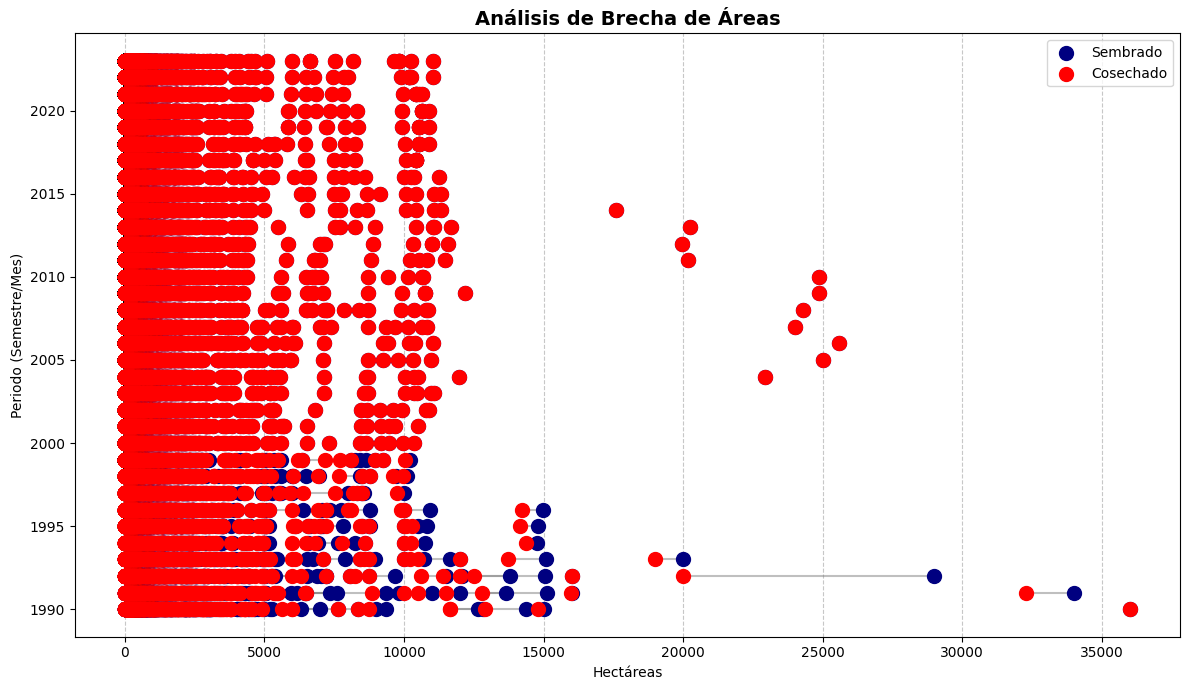

In [10]:
import funciones as func
func.grafico_mancuerna(df_completo, 'Año', 'Área Total', 'Área Producción')


 # Identificación de Cultivos Dinamizadores: Análisis de Concentración de la Producción Agrícola en Antioquia mediante el Principio de Pareto
 ### ¿Qué porcentaje de los cultivos (Rubros) representan el 80% de la producción total del departamento?

 Resultado del Análisis: Aproximadamente 10 rubros generan el 80% de la producción total.


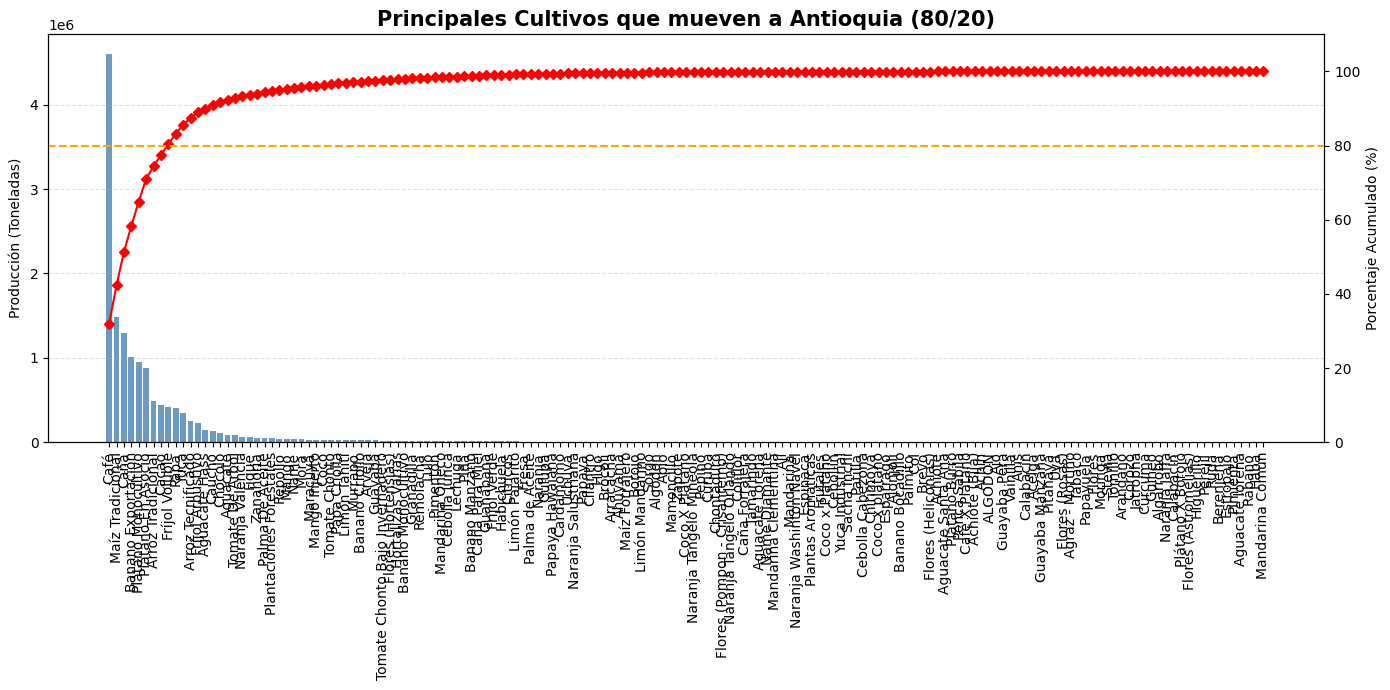

In [12]:
func.grafico_pareto_rubros(df_completo, 'Rubro', 'Área Producción', titulo="Principales Cultivos que mueven a Antioquia (80/20)")